# Problem Understanding

The objective of the problem is to create a classification model to predict whether a person will suffer a brain stroke based 
on certain variables.
The Data set consists of eleven features. They are :
 0   gender             
 1   age               
 2   hypertension       
 3   heart_disease       
 4   ever_married       
 5   work_type          
 6   Residence_type     
 7   avg_glucose_level  
 8   bmi                
 9   smoking_status      
 10  stroke 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("brain_stroke.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [4]:
df.shape

(4981, 11)

# EDA

In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [6]:
df["stroke"].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [7]:
df["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

<AxesSubplot:xlabel='age', ylabel='smoking_status'>

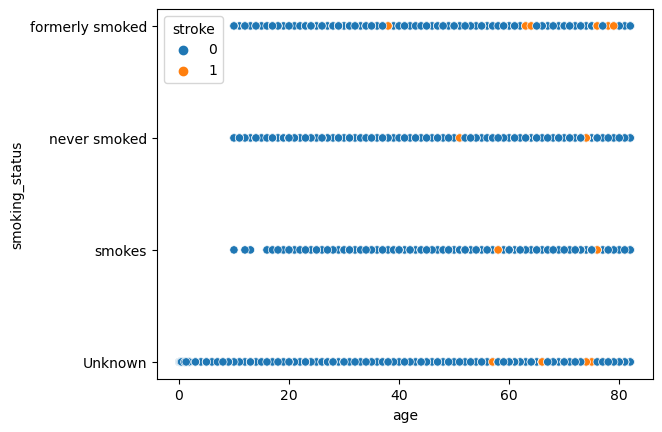

In [9]:
sns.scatterplot(x="age",y="smoking_status",hue="stroke",data=df)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>

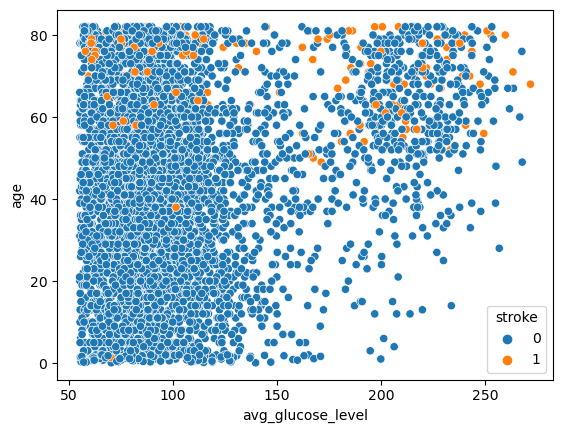

In [10]:
sns.scatterplot(y="age",x="avg_glucose_level",hue="stroke",data=df)

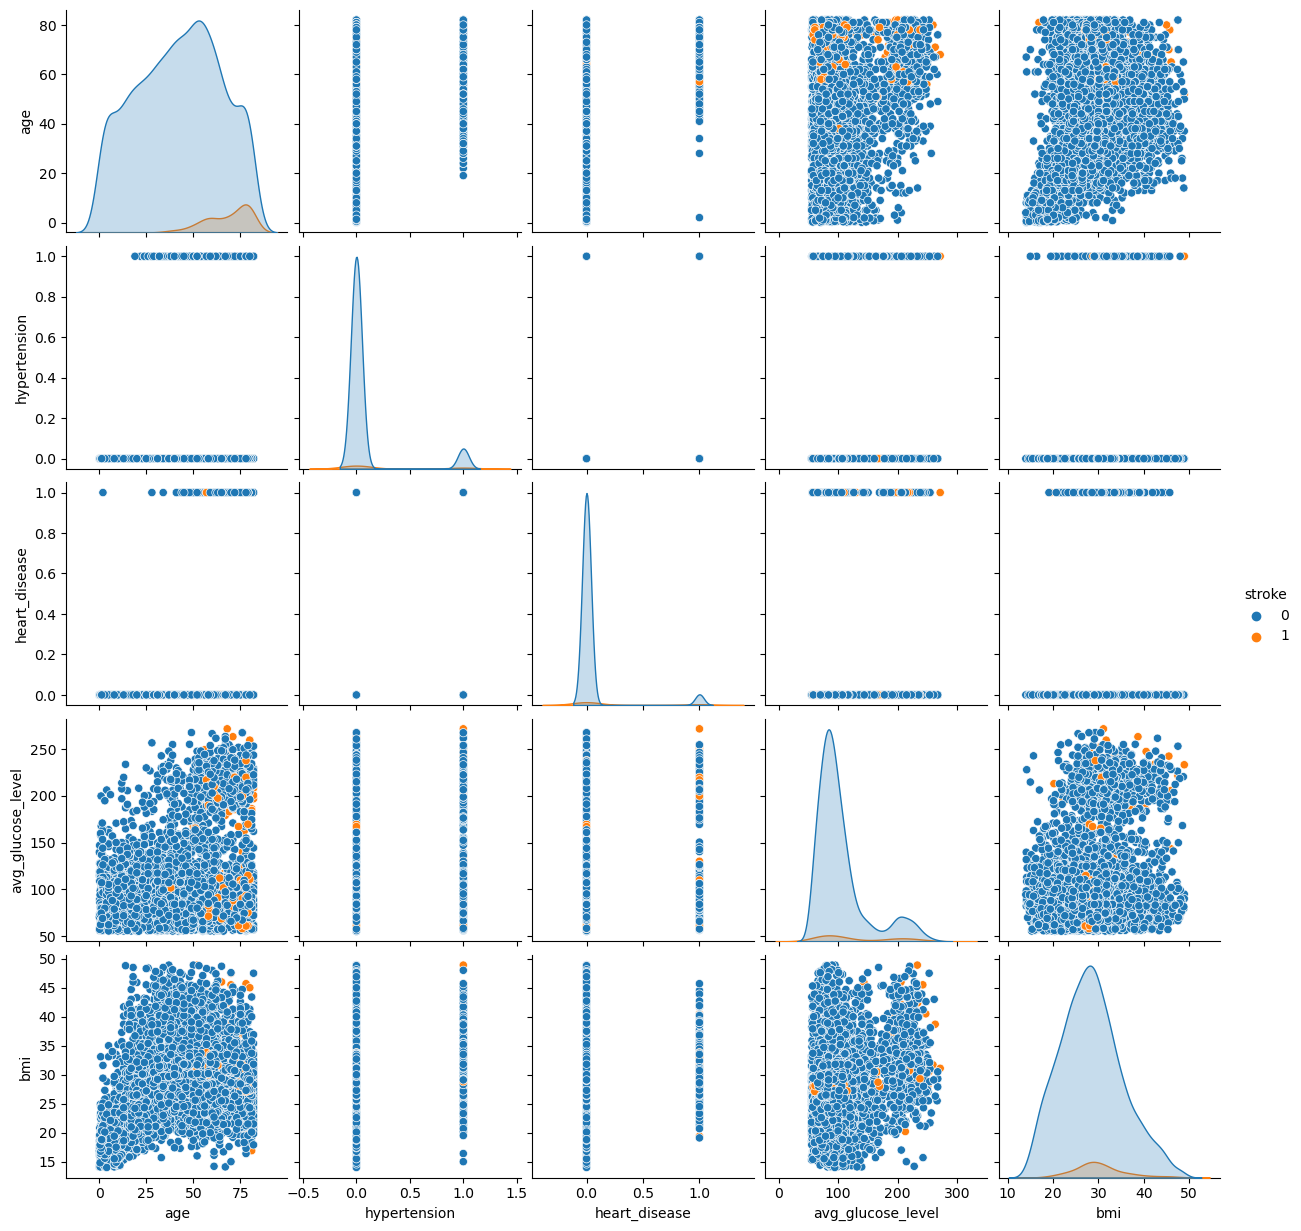

In [11]:
sns.pairplot(df,hue="stroke")

<AxesSubplot:>

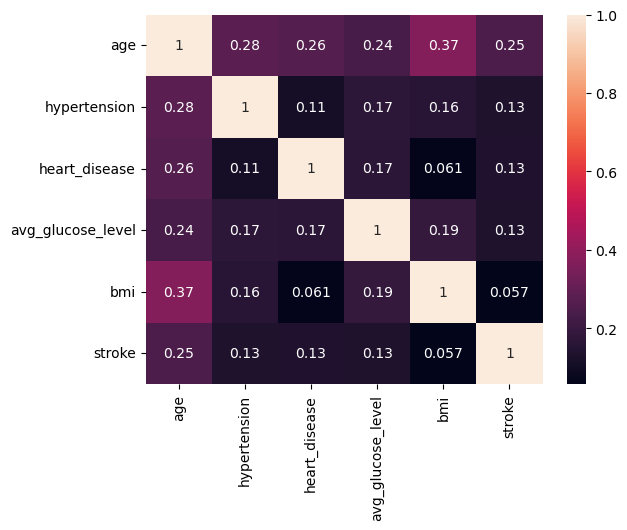

In [12]:
sns.heatmap(df.corr(),annot=True)

# x and y

In [13]:
x=pd.get_dummies(df.drop("stroke",axis=1),drop_first=True)
y=df["stroke"]

# Handling Imbalance Data

In [14]:
from imblearn.over_sampling import SMOTE
SMOTE=SMOTE()
x_new,y_new=SMOTE.fit_resample(x,y)
y_new.value_counts()

1    4733
0    4733
Name: stroke, dtype: int64

# TTS

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.3,random_state=101)

# Modelling with default parameters(Random Forest Classifier)

In [16]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
#prediction
ypredtrain=model.predict(x_train)
ypredtest=model.predict(x_test)
#evaluation
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report
print("Train score:",accuracy_score(y_train,ypredtrain))
print("Test score:",accuracy_score(y_test,ypredtest))

Train score: 1.0
Test score: 0.953169014084507


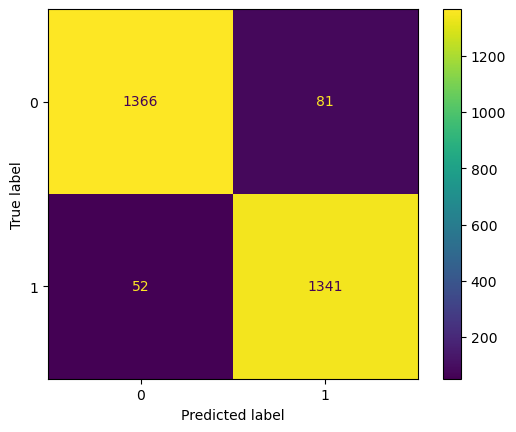

In [17]:
plot_confusion_matrix(model,x_test,y_test)

In [18]:
print(classification_report(y_test,ypredtest))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1447
           1       0.94      0.96      0.95      1393

    accuracy                           0.95      2840
   macro avg       0.95      0.95      0.95      2840
weighted avg       0.95      0.95      0.95      2840



# Cross validation score

In [19]:
scores=cross_val_score(model,x_new,y_new,cv=5)
scores.mean()

0.9490866980053786

# Feature Importance

In [20]:
model.feature_importances_
d=pd.DataFrame(index=x.columns,columns=["features"],data=model.feature_importances_)
d

,features
age,0.369917
hypertension,0.011471
heart_disease,0.011134
avg_glucose_level,0.163818
bmi,0.132697
gender_Male,0.025996
ever_married_Yes,0.020053
work_type_Private,0.035162
work_type_Self-employed,0.030921
work_type_children,0.033208


# HPT

In [21]:
estimator=RandomForestClassifier()
param_grid={"n_estimators":list(range(1,101))}
hpmodel=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
hpmodel.fit(x_train,y_train)
hpmodel.best_params_

{'n_estimators': 92}

# Final Model with best parameters

In [22]:
#Rebuilt model
newmodel=RandomForestClassifier(n_estimators=7)
newmodel.fit(x_train,y_train)
ypredtrain=newmodel.predict(x_train)
ypredtest=newmodel.predict(x_test)
print("Train score:",accuracy_score(y_train,ypredtrain))
print("Test score:",accuracy_score(y_test,ypredtest))

Train score: 0.9962269846060972
Test score: 0.9327464788732395
